In [71]:
import pandas
import yfinance
import numpy as np
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [72]:
df = yfinance.download("BTC-USD", start="2018-01-01", interval="1d")
df

C:\Users\guill\AppData\Local\Temp\ipykernel_35092\3306315017.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yfinance.download("BTC-USD", start="2018-01-01", interval="1d")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2018-01-01,13657.200195,14112.200195,13154.700195,14112.200195,10291200000
2018-01-02,14982.099609,15444.599609,13163.599609,13625.000000,16846600192
2018-01-03,15201.000000,15572.799805,14844.500000,14978.200195,16871900160
2018-01-04,15599.200195,15739.700195,14522.200195,15270.700195,21783199744
2018-01-05,17429.500000,17705.199219,15202.799805,15477.200195,23840899072
...,...,...,...,...,...
2025-08-10,119306.757812,119320.710938,116485.164062,116497.718750,64755458694
2025-08-11,118731.445312,122321.093750,118159.031250,119306.812500,90528784177


In [73]:
print("Forma del dataset:", df.shape)
print("Fechas:", df.index.min(), "a", df.index.max())
print("Columnas:", df.columns.tolist())
df.head()

Forma del dataset: (2783, 5)
Fechas: 2018-01-01 00:00:00 a 2025-08-14 00:00:00
Columnas: [('Close', 'BTC-USD'), ('High', 'BTC-USD'), ('Low', 'BTC-USD'), ('Open', 'BTC-USD'), ('Volume', 'BTC-USD')]


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2018-01-01,13657.200195,14112.200195,13154.700195,14112.200195,10291200000
2018-01-02,14982.099609,15444.599609,13163.599609,13625.000000,16846600192
2018-01-03,15201.000000,15572.799805,14844.500000,14978.200195,16871900160
2018-01-04,15599.200195,15739.700195,14522.200195,15270.700195,21783199744
2018-01-05,17429.500000,17705.199219,15202.799805,15477.200195,23840899072


In [74]:
df.columns = df.columns.get_level_values(0)
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [75]:
# Podríamos añadir:
print("Datos faltantes:")
print(df.isnull().sum())

Datos faltantes:
Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


<Axes: xlabel='Date'>

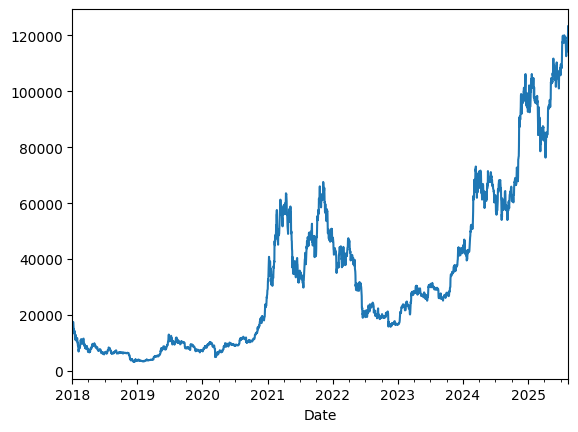

In [77]:
df["Close"].plot()

<Axes: >

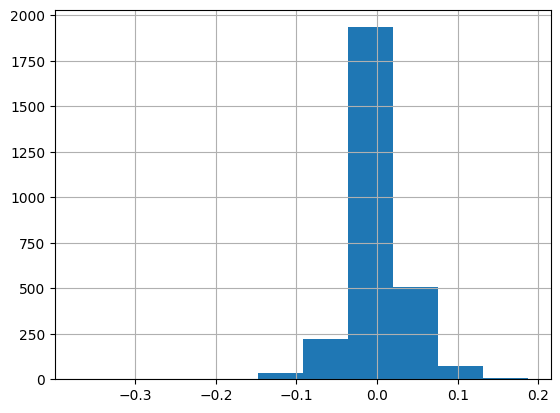

In [78]:
df["Close"].pct_change().hist()

<Axes: xlabel='Date'>

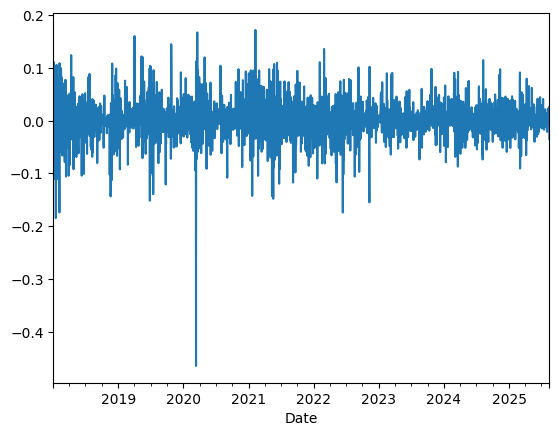

In [79]:
df["Ret_log"] = np.log(df["Close"]/df["Close"].shift(1))
df["Ret_log"].dropna().plot()

Media 0.0007783526609417131
Desviacion estandar 0.034806678423323516
Skew -0.967432552214512
kurtosis 14.392030026793687


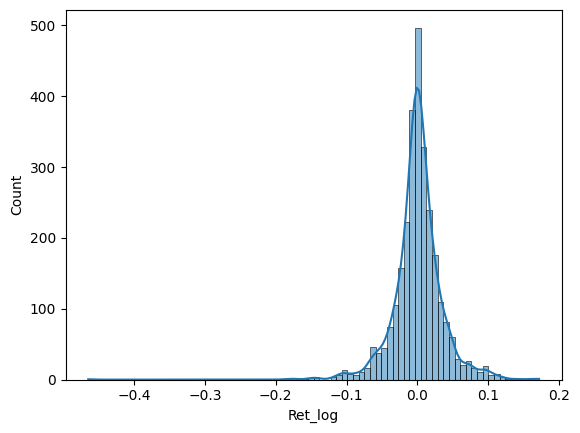

In [80]:
sns.histplot(df["Ret_log"].dropna(), kde=True, bins=80)

print("Media", df["Ret_log"].mean())
print("Desviacion estandar", df["Ret_log"].std())
print("Skew", df["Ret_log"].skew())
print("kurtosis", df["Ret_log"].kurt())

In [81]:
# Separar pre-2023 vs post-2023
ret_pre2023 = df[df.index.year < 2023]["Ret_log"]
ret_post2023 = df[df.index.year >= 2023]["Ret_log"]

print("PRE-2023:")
print(f"Std: {ret_pre2023.std():.4f}")
print(f"Kurtosis: {ret_pre2023.kurt():.2f}")

print("\nPOST-2023:")
print(f"Std: {ret_post2023.std():.4f}")
print(f"Kurtosis: {ret_post2023.kurt():.2f}")

PRE-2023:
Std: 0.0390
Kurtosis: 13.25

POST-2023:
Std: 0.0248
Kurtosis: 2.40


<Axes: xlabel='Date'>

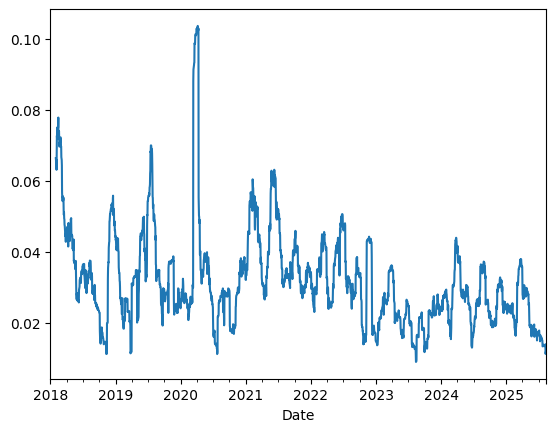

In [82]:
df["Vol_30d"] = df["Ret_log"].rolling(30).std()

df["Vol_30d"].plot()

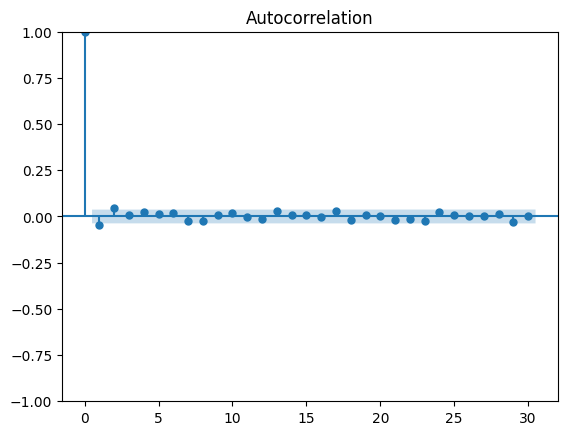

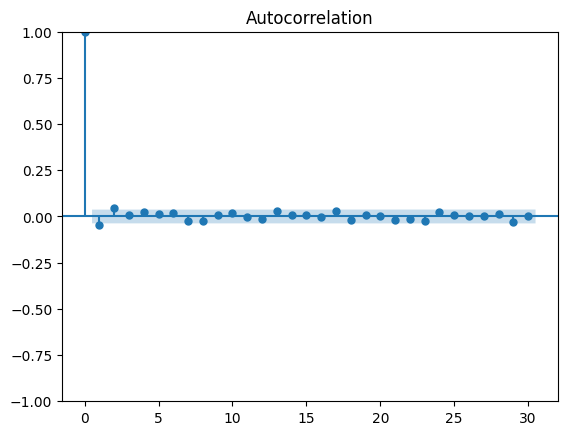

In [83]:
plot_acf(df["Ret_log"].dropna(), lags=30)



<Axes: xlabel='Date'>

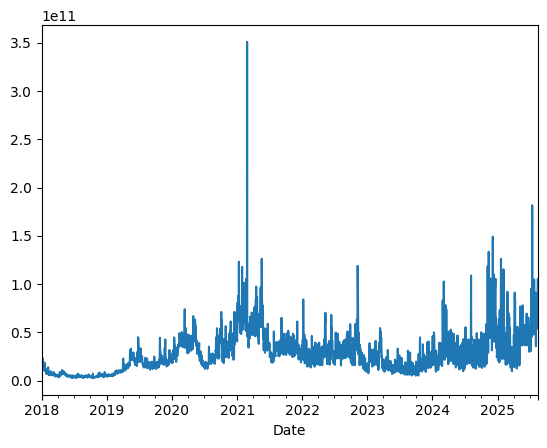

In [84]:
df["Volume"].plot()

<Axes: xlabel='Volume', ylabel='Ret_log'>

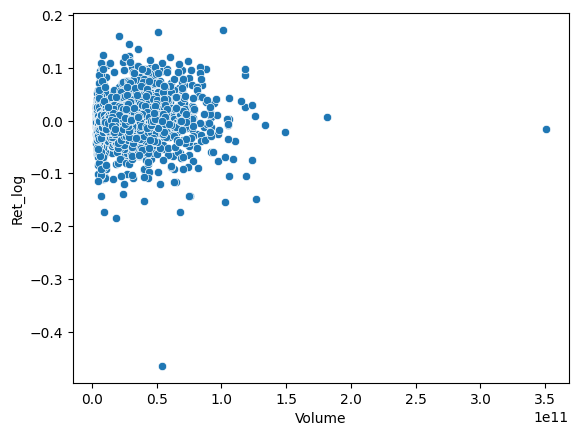

In [85]:
sns.scatterplot(x=df["Volume"], y=df["Ret_log"])

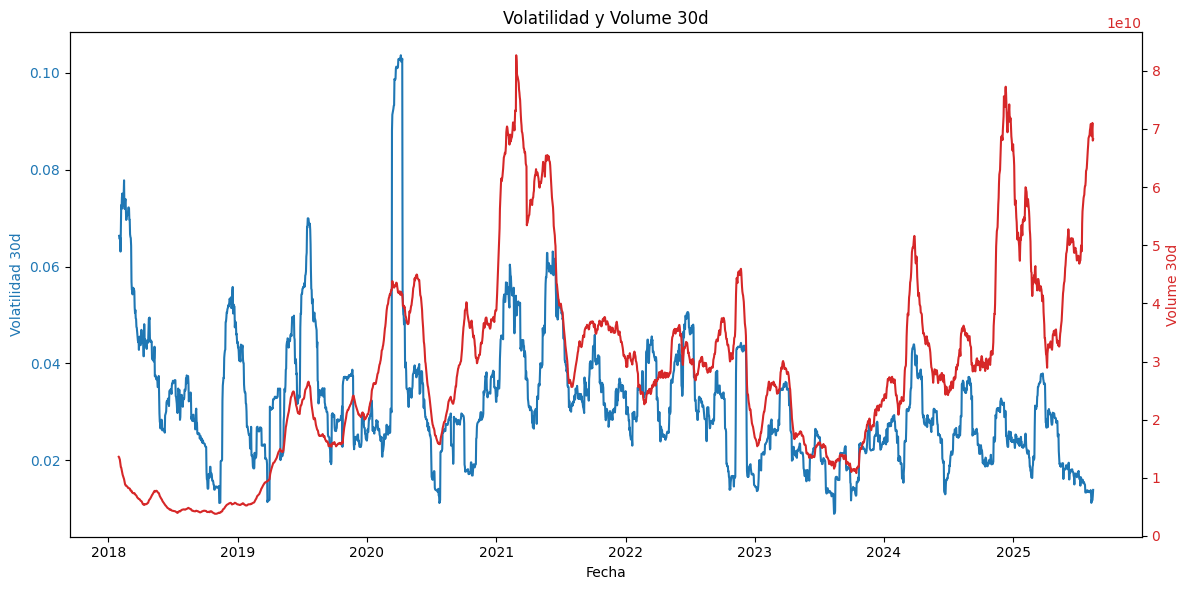

In [86]:
df["Volume_30d"] = df["Volume"].rolling(30).mean()


fig,ax1 = plt.subplots(figsize=(12,6))

color = 'tab:blue'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Volatilidad 30d', color=color)
ax1.plot(df.index, df["Vol_30d"], color=color, label = 'Volatilidad 30d')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Volume 30d', color=color)
ax2.plot(df.index, df["Volume_30d"], color=color, label = 'Volume 30d')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Volatilidad y Volume 30d')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


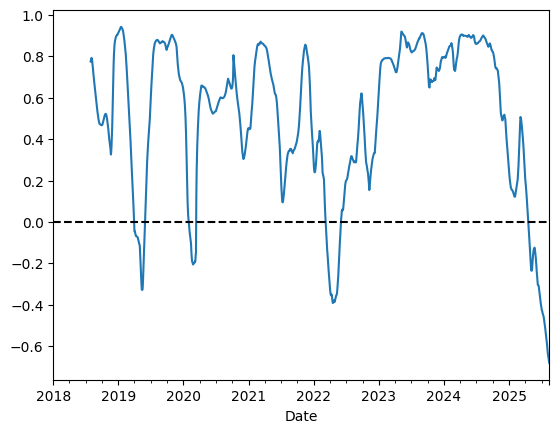

In [87]:
rolling_corr = df["Vol_30d"].rolling(180).corr(df['Volume_30d'])

rolling_corr.plot()

plt.axhline(0, color='black', linestyle='--')



In [ ]:
df["Year"] = df.index.year
df.groupby("Year")["Ret_log"].std().plot(kind='bar')

In [ ]:
from scipy.stats import jarque_bera

jb_stats, jb_p = jarque_bera(df["Ret_log"].dropna())
print(f"JB stat = {jb_stats:.3f} | p-value = {jb_p:.3e}")

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
print("ADF precios p:", adfuller(df["Close"].dropna())[1])   # p>0.05 suele indicar raíz unitaria
print("ADF retornos p:", adfuller(df["Ret_log"].dropna().dropna())[1])  # p<0.05 → estacionarios
print("KPSS retornos p:", kpss(df["Ret_log"].dropna(), nlags="auto")[1]) # p>0.05 apoya estacionariedad


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print(acorr_ljungbox(df["Ret_log"].dropna(), lags=[10,20], return_df=True))
# p-values altos → no hay autocorrelación significativa en la media

In [ ]:
from statsmodels.stats.diagnostic import het_arch
arch_stat, arch_p, _, _ = het_arch(df["Ret_log"].dropna(), nlags=12)
print("ARCH LM p-value:", arch_p)  # p<0.05 → evidencia de efectos ARCH (volatilidad dependiente)
# Alternativa rápida: Ljung–Box sobre |ret| o ret^2
print(acorr_ljungbox(df["Ret_log"].abs().dropna(), lags=[10,20], return_df=True))


In [ ]:
import numpy as np
from scipy.stats import levene
r = df["Ret_log"].dropna()
mask_2018_21 = (r.index.year<=2021)
w_stat, w_p = levene(r[mask_2018_21], r[~mask_2018_21])
print("Levene p-value:", w_p)  # p<0.05 → varianzas distintas (regímenes)
